# Problem Statement: 
Predict the percentage of an student based on the no. of study hours.

In [1]:
#Importing all libraries required for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data from link
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

# Visualisation

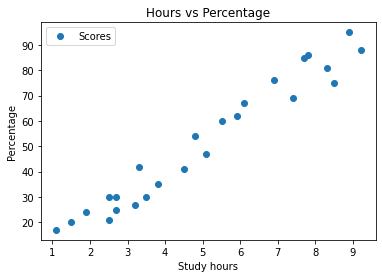

In [6]:
#Plotting the distribution scores
df.plot(x = 'Hours', y = 'Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Study hours')
plt.ylabel('Percentage')
plt.show()

INSIGHT:
From the above graph , we can see that there is a positive linear relation between the number of hours studied and percentage scored.       
    

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)

In [7]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.2,
                                                    random_state=0)

# Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

print('TRAINING COMPLETE')

TRAINING COMPLETE


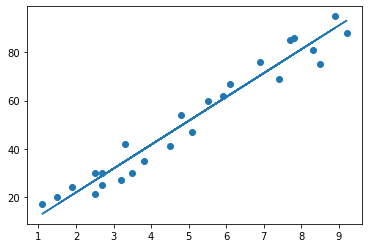

In [10]:
# PLOTTING THE REGRESSION LINE
line = lr.coef_*X+lr.intercept_

# Plotting the test data
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

# Making Predictions

In [11]:
print(X_test) # Testing data - In Hours
Y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
hours = 9.25


In [14]:
own_pred = lr.predict(np.array([6.5]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 66.43742716560922


our predicted value is 66.44% if a student studies for 9.25 hours

# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


# Conclusion:
Our predicted value is 66.44% if a student studies for 9.25 hours for linear rgression model whose Mean Absolute Error is 4.18